In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from osgeo import gdal
import numpy as np
import osr

In [3]:
def resample_tif(tif_file, pixel_spacing=0.5):
    source = gdal.Open(tif_file)
    source.GetRasterBand(1).SetNoDataValue(-32767)
    wgs84 = osr.SpatialReference() # slopppy 
    wgs84.ImportFromEPSG(3413)     # only for polar stereographic!
    # Get the Geotransform vector
    geo_t = source.GetGeoTransform()
    x_size = source.RasterXSize # Raster xsize
    y_size = source.RasterYSize # Raster ysize
    # Work out the boundaries of the new dataset in the target projection
    ulx, uly = geo_t[0], geo_t[3]
    lrx = geo_t[0] + geo_t[1]*x_size
    lry = geo_t[3] + geo_t[5]*y_size
    # Now, we create an in-memory raster
    mem_drv = gdal.GetDriverByName('MEM')
    # The size of the raster is given the new projection and pixel spacing
    # Using the values we calculated above. Also, setting it to store one band
    # and to use Float32 data type.
    dest = mem_drv.Create('', int((lrx - ulx)/pixel_spacing), \
            int((uly - lry)/pixel_spacing), 1, gdal.GDT_Float32)

    # Calculate the new geotransform
    new_geo = ( ulx, pixel_spacing, geo_t[2], \
                uly, geo_t[4], -pixel_spacing )
    # Set the geotransform
    dest.SetGeoTransform(new_geo)
    dest.SetProjection(source.GetProjection())
    # Perform the projection/resampling 

    return dest, source

In [4]:
input_file = "/Users/grigsbye/Desktop/April_21st_DEMs/IODMS3_20120321_15202432_09868_DEM.tif"  # Change this for your system

In [5]:
testD, testS = resample_tif(input_file)

In [6]:
gdal.ReprojectImage(testS, testD, None, None, gdal.GRA_Bilinear)

0

<matplotlib.colorbar.Colorbar instance at 0x120f10680>

/usr/local/lib/python2.7/site-packages/matplotlib/colors.py:579: RuntimeWarning: overflow encountered in multiply
  xa *= self.N
/usr/local/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


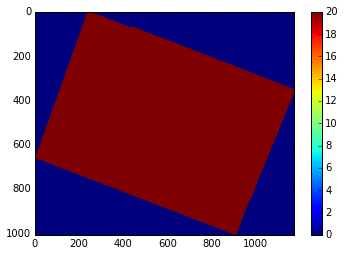

In [7]:
imshow(testD.GetRasterBand(1).ReadAsArray(),vmax = 20, vmin=0)
colorbar()

<matplotlib.colorbar.Colorbar instance at 0x1292a9a70>

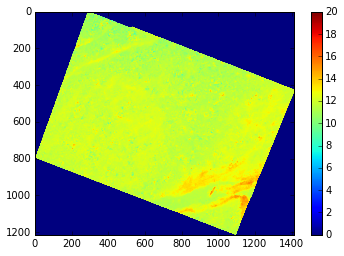

In [8]:
imshow(testS.GetRasterBand(1).ReadAsArray(),vmax = 20, vmin=0)
colorbar()

In [9]:
gdal.ReprojectImage(testS, testD, None, None, gdal.GRA_NearestNeighbour)

0

<matplotlib.colorbar.Colorbar instance at 0x120d10d40>

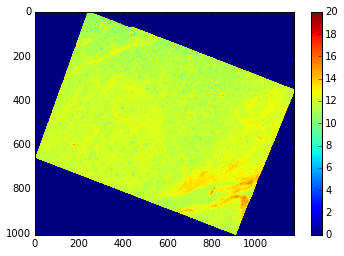

In [10]:
imshow(testD.GetRasterBand(1).ReadAsArray(),vmax = 20, vmin=0)
colorbar()